In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV
df = pd.read_csv("PerformanceRating.csv")

# Peek at the data to confirm it's loaded correctly
df.head()

,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
0,PR01,79F7-78EC,1/2/2013,5,4,5,1,0,4,4,4
1,PR02,B61E-0F26,1/3/2013,5,4,4,1,3,4,4,3
2,PR03,F5E3-48BB,1/3/2013,3,4,5,3,2,3,5,4
3,PR04,0678-748A,1/4/2013,5,3,2,2,0,2,3,2
4,PR05,541F-3E19,1/4/2013,5,2,3,1,0,4,4,3


In [97]:
df.shape

(6709, 11)

Many more rows in this one than Employees, explore correlations first

In [5]:
df['EmployeeID'].nunique()

1280

In [6]:
emp = pd.read_csv("Employee.csv")

emp.head()

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,Divorced,102059,1,No,2012-01-03,No,10,4,9,7
1,CBCB-9C9D,Leonerd,Aland,Male,38,Some Travel,Sales,23,CA,White,...,Single,157718,0,Yes,2012-01-04,No,10,6,10,0
2,95D7-1CE9,Ahmed,Sykes,Male,43,Some Travel,Human Resources,29,CA,Asian or Asian American,...,Married,309964,1,No,2012-01-04,No,10,6,10,8
3,47A0-559B,Ermentrude,Berrie,Non-Binary,39,Some Travel,Technology,12,IL,White,...,Married,293132,0,No,2012-01-05,No,10,10,10,0
4,42CC-040A,Stace,Savege,Female,29,Some Travel,Human Resources,29,CA,White,...,Single,49606,0,No,2012-01-05,Yes,6,1,1,6


In [7]:
# Check unieque IDs
rating_ids = set(df["EmployeeID"].unique())
employee_ids = set(emp["EmployeeID"].unique())

# Which IDs are missing?
missing_in_employee = rating_ids - employee_ids

len(missing_in_employee)

0

In [8]:
len(df)

6709

In [9]:
len(emp)

1470

In [10]:
missing_in_ratings = employee_ids - rating_ids
len(missing_in_ratings)

190

In [11]:
190/1470

0.1292517006802721

Total of 13% of employees didnt get ratings

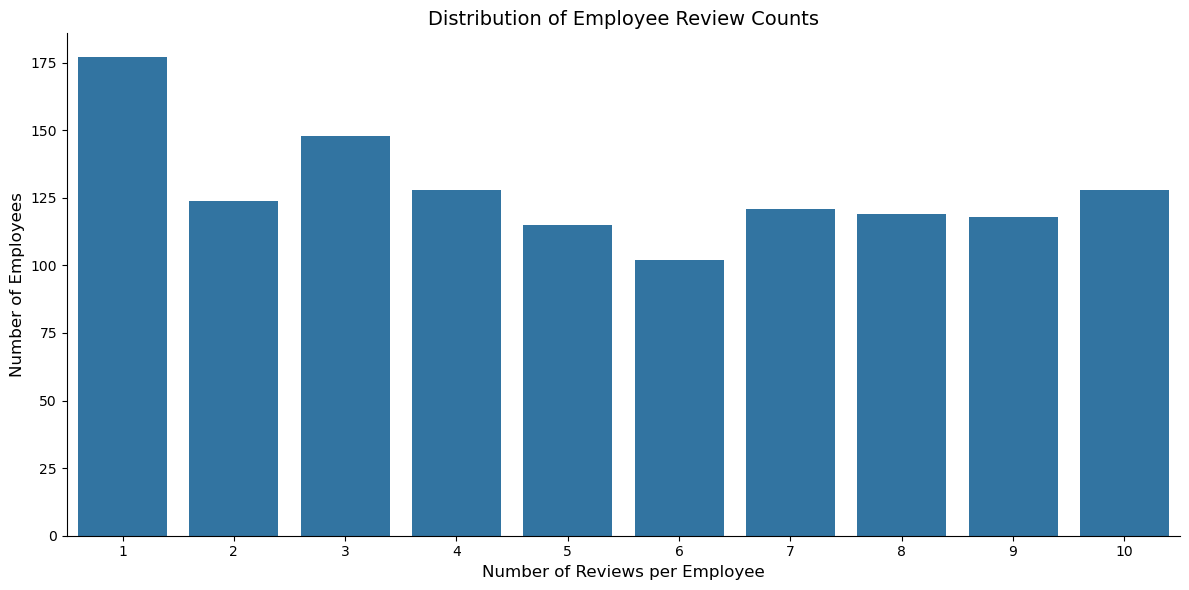

In [13]:
# Get counts per employee
review_counts = df.groupby("EmployeeID").size().reset_index(name="Review_Count")

# Distribution of how many employees have 1, 2, 3... reviews
count_dist = review_counts["Review_Count"].value_counts().sort_index()

plt.figure(figsize=(12,6))
sns.barplot(x=count_dist.index, y=count_dist.values)

plt.xlabel("Number of Reviews per Employee", fontsize=12)
plt.ylabel("Number of Employees", fontsize=12)
plt.title("Distribution of Employee Review Counts", fontsize=14)
plt.xticks(rotation=0)
sns.despine()
plt.tight_layout()
plt.show()

In [42]:
len(review_counts)

1280

In [14]:
review_counts["Review_Count"].max()

10

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6709 entries, 0 to 6708
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   PerformanceID                    6709 non-null   object
 1   EmployeeID                       6709 non-null   object
 2   ReviewDate                       6709 non-null   object
 3   EnvironmentSatisfaction          6709 non-null   int64 
 4   JobSatisfaction                  6709 non-null   int64 
 5   RelationshipSatisfaction         6709 non-null   int64 
 6   TrainingOpportunitiesWithinYear  6709 non-null   int64 
 7   TrainingOpportunitiesTaken       6709 non-null   int64 
 8   WorkLifeBalance                  6709 non-null   int64 
 9   SelfRating                       6709 non-null   int64 
 10  ManagerRating                    6709 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 576.7+ KB


In [16]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EmployeeID               1470 non-null   object
 1   FirstName                1470 non-null   object
 2   LastName                 1470 non-null   object
 3   Gender                   1470 non-null   object
 4   Age                      1470 non-null   int64 
 5   BusinessTravel           1470 non-null   object
 6   Department               1470 non-null   object
 7   DistanceFromHome (KM)    1470 non-null   int64 
 8   State                    1470 non-null   object
 9   Ethnicity                1470 non-null   object
 10  Education                1470 non-null   int64 
 11  EducationField           1470 non-null   object
 12  JobRole                  1470 non-null   object
 13  MaritalStatus            1470 non-null   object
 14  Salary                   1470 non-null  

In [17]:
df.describe()

,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
count,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000
mean,3.872559,3.430616,3.427336,2.012968,1.017290,3.414667,3.984051,3.473394
std,0.940701,1.152565,1.156753,0.820310,0.950316,1.143961,0.816432,0.961738
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3.000000,2.000000
25%,3.000000,2.000000,2.000000,1.000000,0.000000,2.000000,3.000000,3.000000
50%,4.000000,3.000000,3.000000,2.000000,1.000000,3.000000,4.000000,3.000000
75%,5.000000,4.000000,4.000000,3.000000,2.000000,4.000000,5.000000,4.000000
max,5.000000,5.000000,5.000000,3.000000,3.000000,5.000000,5.000000,5.000000


In [18]:
emp.describe()

,Age,DistanceFromHome (KM),Education,Salary,StockOptionLevel,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,28.989796,22.502721,2.912925,112956.497959,0.793878,4.562585,2.293197,3.440816,2.239456
std,7.993055,12.811124,1.024165,103342.889222,0.852077,3.288048,2.539093,2.945194,2.505774
min,18.000000,1.000000,1.000000,20387.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,12.000000,2.000000,43580.500000,0.000000,2.000000,0.000000,1.000000,0.000000
50%,26.000000,22.000000,3.000000,71199.500000,1.000000,4.000000,1.000000,3.000000,1.000000
75%,34.000000,33.000000,4.000000,142055.750000,1.000000,7.000000,4.000000,6.000000,4.000000
max,51.000000,45.000000,5.000000,547204.000000,3.000000,10.000000,10.000000,10.000000,10.000000


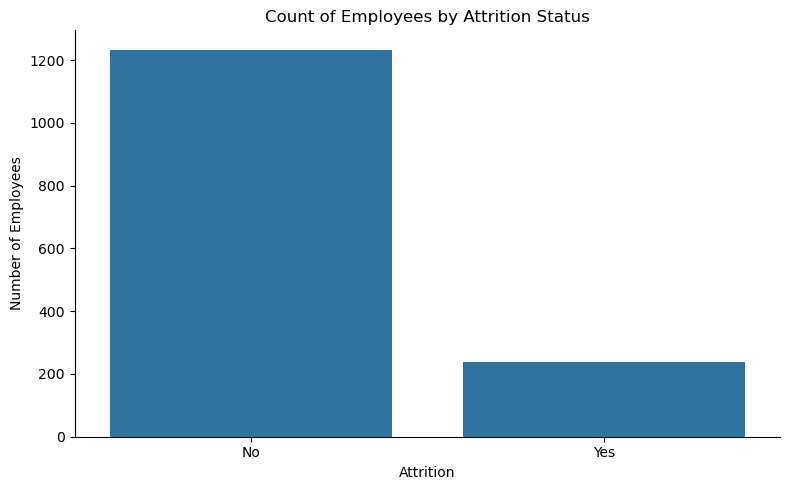

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(x=emp["Attrition"])

plt.xlabel("Attrition")
plt.ylabel("Number of Employees")
plt.title("Count of Employees by Attrition Status")
sns.despine()
plt.tight_layout()
plt.show()

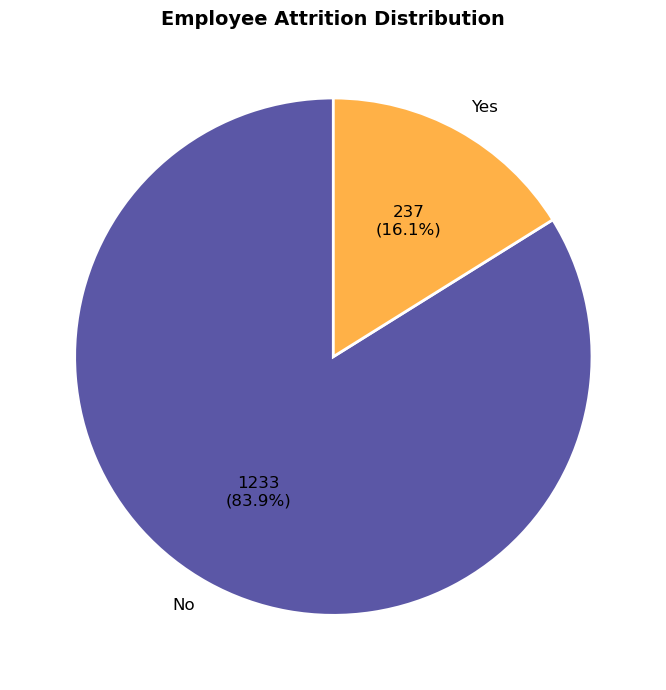

<Figure size 640x480 with 0 Axes>

In [40]:
# Count values
counts = emp["Attrition"].value_counts()

# Color palette (purple, orange)
colors = ["#5B57A6", "#FFB147"]

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f"{count}\n({pct:.1f}%)"
    return my_format

plt.figure(figsize=(7, 7))

plt.pie(
    counts,
    labels=counts.index,
    autopct=autopct_format(counts),
    startangle=90,
    colors=colors,
    wedgeprops={"edgecolor": "white", "linewidth": 2},
    textprops={"fontsize": 12}
)

plt.title("Employee Attrition Distribution", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()
plt.savefig("attrition_pie_chart.png", dpi=300, bbox_inches="tight")

# Goals: 
Main goal: Create a predictive model to predict whether an employee is going to leave or be let go from the company (attrition) using employee stats and performace reviews

-Feature engineer new columns to train in the employee dataset from both the review dataset and employee dataset
-Decide what model is best for this problem (will start with logistic regression and random forest)
-Evaluate model performance and adjust paramters where and when needed

In [53]:
import pandas as pd

# -------------------------------
# 1. Sort by Employee + Time
# -------------------------------
df = df.sort_values(["EmployeeID", "ReviewDate"])

# -------------------------------
# 2. Explicit performance columns to use
# -------------------------------
perf_cols_raw = [
    "EnvironmentSatisfaction",
    "JobSatisfaction",
    "RelationshipSatisfaction",
    "TrainingOpportunitiesWithinYear",
    "TrainingOpportunitiesTaken",
    "WorkLifeBalance",
    "SelfRating",
    "ManagerRating"
]

# -------------------------------
# 3. Force numeric (safety)
# -------------------------------
for col in perf_cols_raw:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# -------------------------------
# 4. Average performance features
# -------------------------------
perf_avg = (
    df.groupby("EmployeeID")[perf_cols_raw]
      .mean()
      .add_prefix("perf_avg_")
)

# -------------------------------
# 5. Latest performance features
# -------------------------------
perf_latest = (
    df.groupby("EmployeeID")
      .tail(1)
      .set_index("EmployeeID")[perf_cols_raw]
      .add_prefix("perf_latest_")
)

# -------------------------------
# 6. Number of reviews per employee
# -------------------------------
perf_count = (
    df.groupby("EmployeeID")
      .size()
      .to_frame("num_reviews")
)

# -------------------------------
# 7. Combine all engineered performance features
# -------------------------------
perf_features = perf_avg.join(perf_latest, how="outer").join(perf_count, how="outer")

# -------------------------------
# 8. Merge into employee table
# -------------------------------
emp = emp.merge(perf_features, how="left", left_on="EmployeeID", right_index=True)

# -------------------------------
# 9. Fill missing (no-review employees) with -1
# -------------------------------
emp[perf_features.columns] = emp[perf_features.columns].fillna(-1)


In [55]:
emp.head()

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,perf_avg_ManagerRating,perf_latest_EnvironmentSatisfaction,perf_latest_JobSatisfaction,perf_latest_RelationshipSatisfaction,perf_latest_TrainingOpportunitiesWithinYear,perf_latest_TrainingOpportunitiesTaken,perf_latest_WorkLifeBalance,perf_latest_SelfRating,perf_latest_ManagerRating,num_reviews
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,3.555556,5.0,5.0,2.0,2.0,1.0,5.0,4.0,4.0,9.0
1,CBCB-9C9D,Leonerd,Aland,Male,38,Some Travel,Sales,23,CA,White,...,3.888889,4.0,3.0,4.0,3.0,2.0,4.0,5.0,5.0,9.0
2,95D7-1CE9,Ahmed,Sykes,Male,43,Some Travel,Human Resources,29,CA,Asian or Asian American,...,3.000000,3.0,4.0,3.0,1.0,0.0,5.0,4.0,4.0,9.0
3,47A0-559B,Ermentrude,Berrie,Non-Binary,39,Some Travel,Technology,12,IL,White,...,3.555556,5.0,4.0,3.0,1.0,1.0,2.0,5.0,5.0,9.0
4,42CC-040A,Stace,Savege,Female,29,Some Travel,Human Resources,29,CA,White,...,3.000000,5.0,2.0,5.0,2.0,1.0,3.0,3.0,2.0,9.0


Attrition distribution for employees with NO performance reviews:
Attrition
No    190
Name: count, dtype: int64

Percentages:
Attrition
No    100.0
Name: proportion, dtype: float64


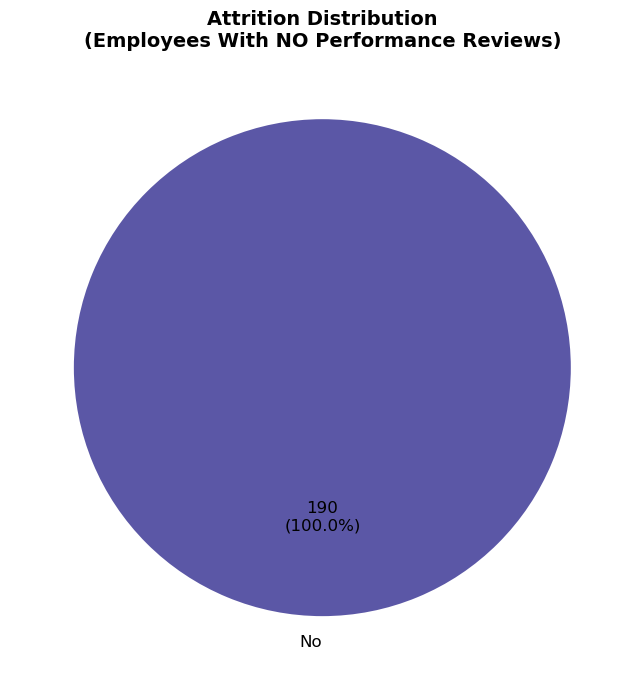

In [57]:
import matplotlib.pyplot as plt

# 1. Filter employees with NO performance reviews
no_review_emp = emp[emp["num_reviews"] == -1]

# 2. Get attrition distribution (counts and percentages)
counts = no_review_emp["Attrition"].value_counts()
percents = no_review_emp["Attrition"].value_counts(normalize=True) * 100

print("Attrition distribution for employees with NO performance reviews:")
print(counts)
print("\nPercentages:")
print(percents.round(2))

# 3. Pie chart (purple + orange, with count + %)
colors = ["#5B57A6", "#FFB147"]  # purple, orange

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f"{count}\n({pct:.1f}%)"
    return my_format

plt.figure(figsize=(7, 7))

plt.pie(
    counts,
    labels=counts.index,
    autopct=autopct_format(counts),
    startangle=90,
    colors=colors,
    wedgeprops={"edgecolor": "white", "linewidth": 2},
    textprops={"fontsize": 12}
)

plt.title("Attrition Distribution\n(Employees With NO Performance Reviews)", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()


In [73]:
emp["Attrition"].value_counts(dropna=False)

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [85]:
emp.loc[emp["num_reviews"] == -1, "Attrition"].value_counts(dropna=False)

Attrition
No    190
Name: count, dtype: int64

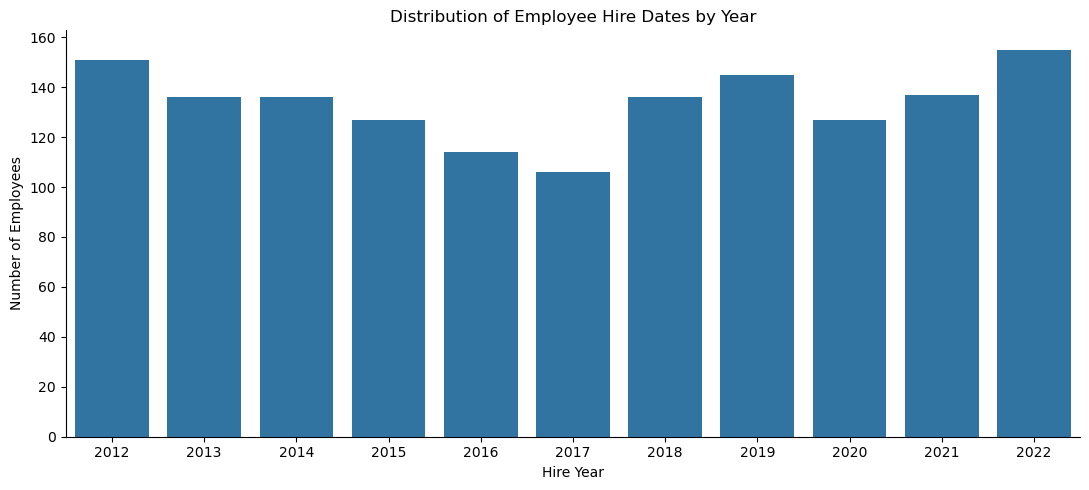

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure HireDate is datetime
emp["HireDate"] = pd.to_datetime(emp["HireDate"], errors="coerce")

# Extract hire year
emp["HireYear"] = emp["HireDate"].dt.year

# Plot distribution
plt.figure(figsize=(11, 5))
sns.countplot(x=emp["HireYear"])
plt.xlabel("Hire Year")
plt.ylabel("Number of Employees")
plt.title("Distribution of Employee Hire Dates by Year")
sns.despine()
plt.tight_layout()
plt.show()


C:\Users\benja\AppData\Local\Temp\ipykernel_139360\699625370.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zero_review_emp["HireDate"] = pd.to_datetime(zero_review_emp["HireDate"], errors="coerce")
C:\Users\benja\AppData\Local\Temp\ipykernel_139360\699625370.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zero_review_emp["HireYear"] = zero_review_emp["HireDate"].dt.year


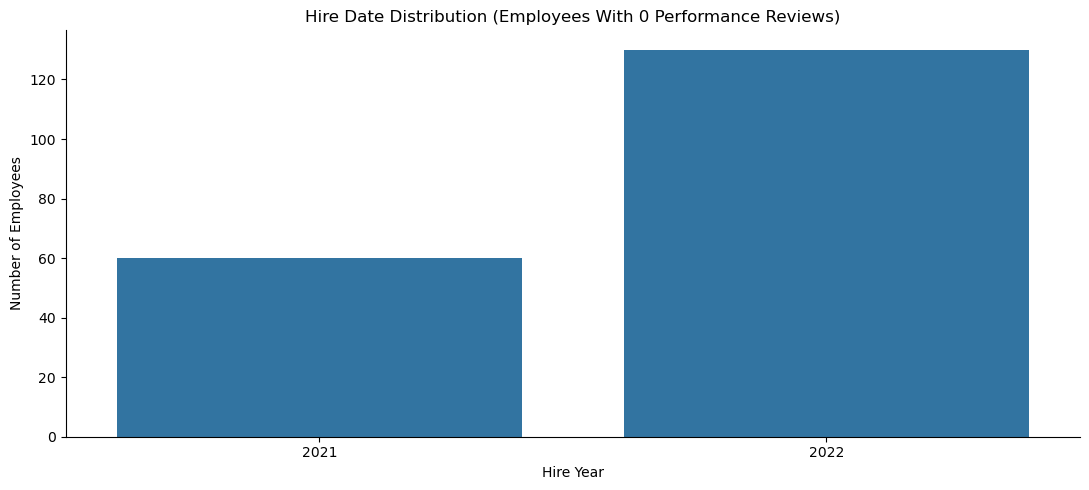

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ----------------------------
# 1. Filter employees with 0 reviews
# ----------------------------
zero_review_emp = emp[emp["num_reviews"] == -1]

# ----------------------------
# 2. Ensure HireDate is datetime
# ----------------------------
zero_review_emp["HireDate"] = pd.to_datetime(zero_review_emp["HireDate"], errors="coerce")

# ----------------------------
# 3. Extract Hire Year
# ----------------------------
zero_review_emp["HireYear"] = zero_review_emp["HireDate"].dt.year

# ----------------------------
# 4. Plot Hire Date Distribution (Count Plot)
# ----------------------------
plt.figure(figsize=(11, 5))
sns.countplot(x=zero_review_emp["HireYear"])
plt.xlabel("Hire Year")
plt.ylabel("Number of Employees")
plt.title("Hire Date Distribution (Employees With 0 Performance Reviews)")
sns.despine()
plt.tight_layout()
plt.show()


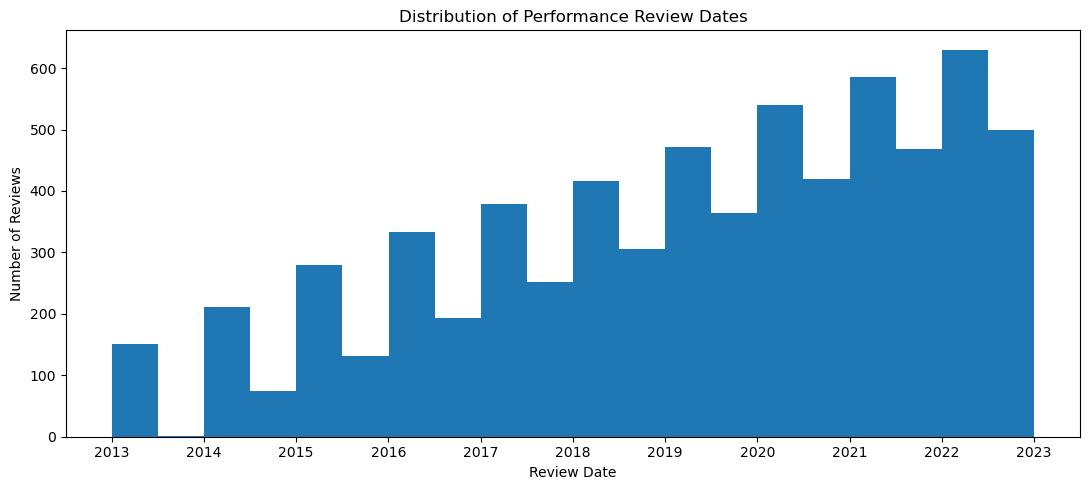

In [103]:

# Make sure ReviewDate is datetime
df["ReviewDate"] = pd.to_datetime(df["ReviewDate"], errors="coerce")

# ----------------------------
# 1. Histogram of Review Dates
# ----------------------------
plt.figure(figsize=(11, 5))
plt.hist(df["ReviewDate"].dropna(), bins=20)
plt.xlabel("Review Date")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Performance Review Dates")
plt.tight_layout()
plt.show()

In [105]:
df["ReviewDate"] = pd.to_datetime(df["ReviewDate"], errors="coerce")

latest_review_date = df["ReviewDate"].max()
latest_review_date

Timestamp('2022-12-31 00:00:00')

In [111]:
emp["HireDate"] = pd.to_datetime(emp["HireDate"], errors="coerce")

latest_review_date = emp["HireDate"].max()
latest_review_date

Timestamp('2022-12-31 00:00:00')

In [113]:
# Ensure HireDate is datetime
emp["HireDate"] = pd.to_datetime(emp["HireDate"], errors="coerce")

# Fixed reference date: December 31, 2022
reference_date = pd.Timestamp("2022-12-31")

# Create DaysAfterHire as of Dec 31, 2022
emp["DaysAfterHire"] = (reference_date - emp["HireDate"]).dt.days

In [115]:
emp.head()

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,perf_latest_JobSatisfaction,perf_latest_RelationshipSatisfaction,perf_latest_TrainingOpportunitiesWithinYear,perf_latest_TrainingOpportunitiesTaken,perf_latest_WorkLifeBalance,perf_latest_SelfRating,perf_latest_ManagerRating,num_reviews,HireYear,DaysAfterHire
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,5.0,2.0,2.0,1.0,5.0,4.0,4.0,9.0,2012,4015
1,CBCB-9C9D,Leonerd,Aland,Male,38,Some Travel,Sales,23,CA,White,...,3.0,4.0,3.0,2.0,4.0,5.0,5.0,9.0,2012,4014
2,95D7-1CE9,Ahmed,Sykes,Male,43,Some Travel,Human Resources,29,CA,Asian or Asian American,...,4.0,3.0,1.0,0.0,5.0,4.0,4.0,9.0,2012,4014
3,47A0-559B,Ermentrude,Berrie,Non-Binary,39,Some Travel,Technology,12,IL,White,...,4.0,3.0,1.0,1.0,2.0,5.0,5.0,9.0,2012,4013
4,42CC-040A,Stace,Savege,Female,29,Some Travel,Human Resources,29,CA,White,...,2.0,5.0,2.0,1.0,3.0,3.0,2.0,9.0,2012,4013


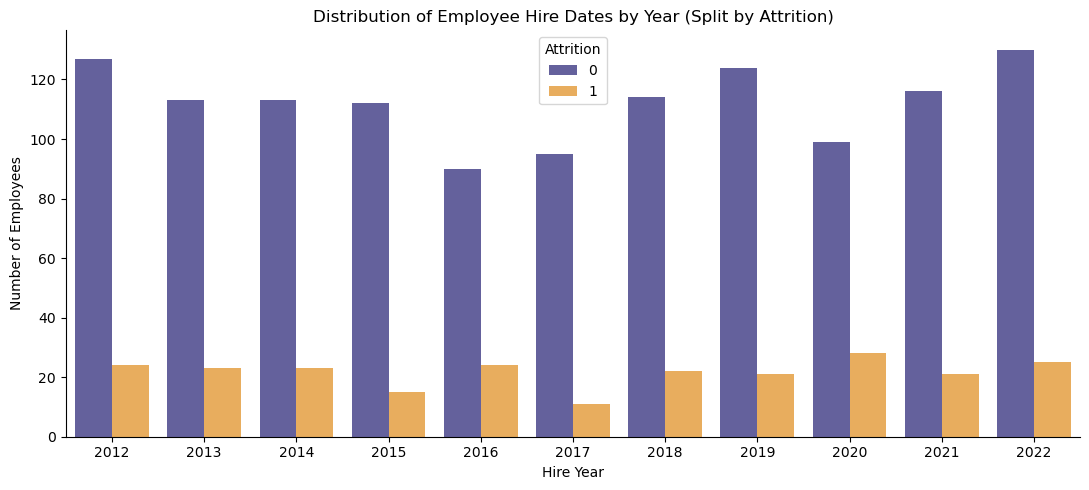

In [126]:
# Ensure HireDate is datetime
emp["HireDate"] = pd.to_datetime(emp["HireDate"], errors="coerce")

# Extract hire year
emp["HireYear"] = emp["HireDate"].dt.year

# Attrition is encoded as 0/1 → use numeric keys
attrition_palette = {
    0: "#5B57A6",  # No attrition (stay) – purple
    1: "#FFB147"   # Attrition (left) – orange
}

plt.figure(figsize=(11, 5))
sns.countplot(
    x="HireYear",
    hue="Attrition",
    data=emp,
    palette=attrition_palette
)

plt.xlabel("Hire Year")
plt.ylabel("Number of Employees")
plt.title("Distribution of Employee Hire Dates by Year (Split by Attrition)")
sns.despine()
plt.tight_layout()
plt.show()


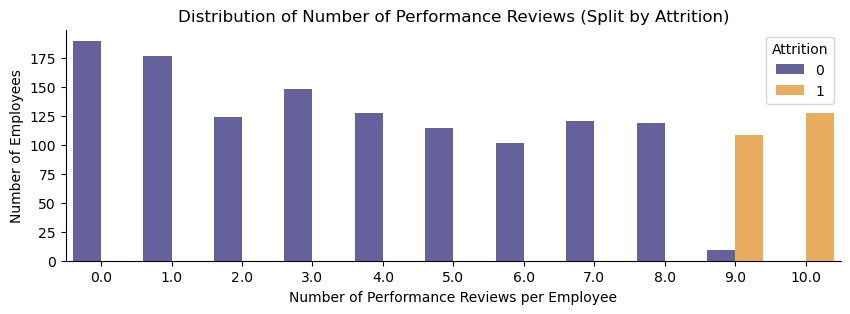

In [180]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Palette mapped to Attrition (0 = No, 1 = Yes)
attrition_palette = {
    0: "#5B57A6",  # Purple = Stayed
    1: "#FFB147"   # Orange = Left
}

plt.figure(figsize=(10,3))

sns.countplot(
    x="num_reviews_display",
    hue="Attrition",
    data=emp,
    palette=attrition_palette
)

plt.xlabel("Number of Performance Reviews per Employee")
plt.ylabel("Number of Employees")
plt.title("Distribution of Number of Performance Reviews (Split by Attrition)")

# Force integer x-axis labels
plt.xticks(np.sort(emp["num_reviews_display"].unique()))

sns.despine()

plt.show()


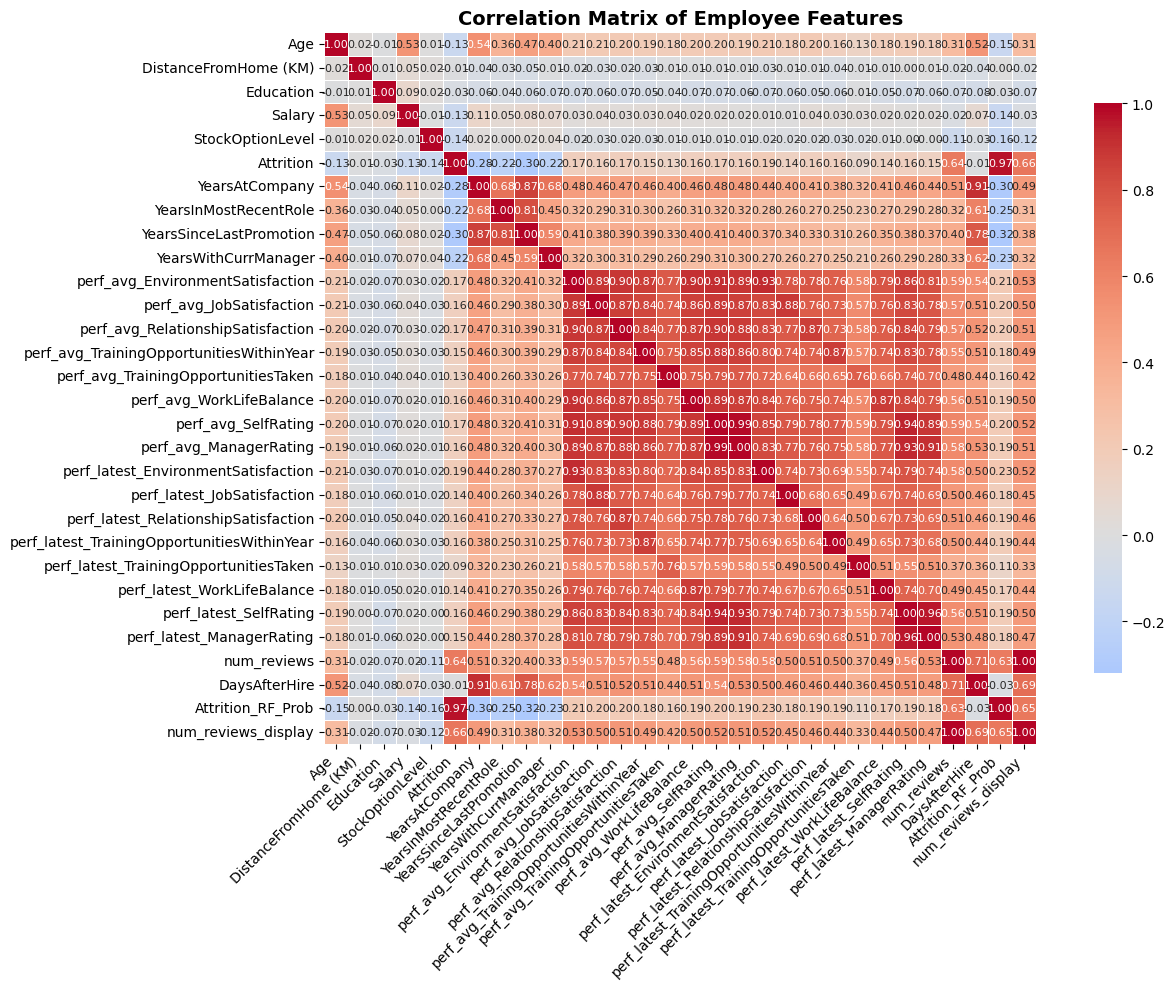

In [142]:

# Select only numeric columns for correlation
corr_df = emp.select_dtypes(include=["int64", "float64"])

# Compute correlation matrix
corr_matrix = corr_df.corr()

plt.figure(figsize=(14, 10))

sns.heatmap(
    corr_matrix,
    cmap="coolwarm",        # hot–cool palette
    center=0,
    linewidths=0.5,
    linecolor="white",
    square=True,
    annot=True,            # ✅ SHOW NUMERIC VALUES
    fmt=".2f",             # ✅ FORMAT TO 2 DECIMALS
    annot_kws={"size": 8}, # ✅ CONTROL FONT SIZE
    cbar_kws={"shrink": 0.8}
)

plt.title("Correlation Matrix of Employee Features", fontsize=14, weight="bold")
plt.xticks(rotation=45, ha="right")  # ✅ READABLE LABELS
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [148]:
emp_attrition_1 = emp[emp["Attrition"] == 1]
emp_attrition_1.head(20)

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,perf_latest_TrainingOpportunitiesWithinYear,perf_latest_TrainingOpportunitiesTaken,perf_latest_WorkLifeBalance,perf_latest_SelfRating,perf_latest_ManagerRating,num_reviews,HireYear,DaysAfterHire,Attrition_RF_Prob,num_reviews_display
4,42CC-040A,Stace,Savege,Female,29,Some Travel,Human Resources,29,CA,White,...,2.0,1.0,3.0,3.0,2.0,9.0,2012,4013,0.800000,9.0
9,5476-CA0D,Kayley,Snoad,Female,31,Frequent Traveller,Technology,4,NY,Native Hawaiian,...,2.0,1.0,2.0,5.0,4.0,10.0,2012,4006,0.373333,10.0
20,D7EE-56FC,Zsa zsa,Evered,Female,39,Frequent Traveller,Sales,17,CA,White,...,2.0,0.0,3.0,5.0,5.0,10.0,2012,3999,0.763333,10.0
30,00D4-DD53,Joyce,Goor,Female,30,Frequent Traveller,Technology,44,CA,Black or African American,...,3.0,2.0,4.0,5.0,4.0,10.0,2012,3990,0.753333,10.0
35,3CD6-5587,Dorise,Klishin,Female,31,Some Travel,Technology,20,CA,White,...,1.0,1.0,4.0,5.0,5.0,10.0,2012,3985,0.440000,10.0
49,C79A-E5E1,Alvera,Kulver,Female,32,Frequent Traveller,Technology,13,CA,White,...,2.0,1.0,2.0,3.0,2.0,10.0,2012,3970,0.760000,10.0
53,151D-1FF2,Kai,Lush,Female,34,Frequent Traveller,Sales,15,CA,White,...,1.0,0.0,3.0,3.0,2.0,10.0,2012,3967,0.766667,10.0
58,E4F4-11B9,Susanne,Wisam,Female,29,Some Travel,Sales,19,NY,White,...,2.0,0.0,3.0,4.0,4.0,10.0,2012,3960,0.863333,10.0
76,076F-8AA3,Reese,Dibbert,Male,39,Some Travel,Technology,5,CA,White,...,1.0,0.0,5.0,4.0,4.0,10.0,2012,3950,0.280000,10.0
79,1C87-44CB,Darlene,Mansbridge,Female,28,Frequent Traveller,Technology,9,CA,Black or African American,...,3.0,0.0,3.0,3.0,2.0,10.0,2012,3944,0.793333,10.0


## Machine Learning

In [118]:

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# ---------------------------------------------------
# 1. Ensure target is numeric (0/1)
# ---------------------------------------------------
# Assumes Attrition is "Yes"/"No" or already 0/1
if emp["Attrition"].dtype == "O":
    emp["Attrition"] = emp["Attrition"].map({"Yes": 1, "No": 0})

# ---------------------------------------------------
# 2. Define X, y and drop ID / date columns
# ---------------------------------------------------
drop_cols = [col for col in ["Attrition", "EmployeeID", "HireDate"] if col in emp.columns]

X = emp.drop(columns=drop_cols)
y = emp["Attrition"]

# Identify numeric and categorical columns
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

print("Numeric features:", num_cols)
print("Categorical features:", cat_cols)

# ---------------------------------------------------
# 3. Preprocessor: passthrough nums, one-hot encode cats
# ---------------------------------------------------
preprocess = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ]
)

# ---------------------------------------------------
# 4. Random Forest model (class-weighted for imbalance)
# ---------------------------------------------------
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    n_jobs=-1,
    class_weight="balanced",
    random_state=42,
)

model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("rf", rf),
])

# ---------------------------------------------------
# 5. Train / test split
# ---------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42,
)

# ---------------------------------------------------
# 6. Fit model
# ---------------------------------------------------
model.fit(X_train, y_train)

# ---------------------------------------------------
# 7. Evaluate on test set
# ---------------------------------------------------
y_pred = model.predict(X_test)

print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=3))

# ---------------------------------------------------
# 8. Feature importances (weights)
# ---------------------------------------------------
# Get trained RF from pipeline
rf_trained = model.named_steps["rf"]

# Get feature names after preprocessing
ohe = model.named_steps["preprocess"].named_transformers_["cat"]
cat_feature_names = ohe.get_feature_names_out(cat_cols) if len(cat_cols) > 0 else []

all_feature_names = list(num_cols) + list(cat_feature_names)

importances = rf_trained.feature_importances_

feature_importance_df = (
    pd.DataFrame({
        "feature": all_feature_names,
        "importance": importances
    })
    .sort_values("importance", ascending=False)
    .reset_index(drop=True)
)

print("\nTop 20 feature importances:")
print(feature_importance_df.head(20))

# ---------------------------------------------------
# 9. (Optional) Add predicted attrition risk back to emp
# ---------------------------------------------------
# WARNING: this uses the same data you trained on – OK for EDA, not for final eval.
emp["Attrition_RF_Prob"] = model.predict_proba(X)[:, 1]


Numeric features: ['Age', 'DistanceFromHome (KM)', 'Education', 'Salary', 'StockOptionLevel', 'YearsAtCompany', 'YearsInMostRecentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'perf_avg_EnvironmentSatisfaction', 'perf_avg_JobSatisfaction', 'perf_avg_RelationshipSatisfaction', 'perf_avg_TrainingOpportunitiesWithinYear', 'perf_avg_TrainingOpportunitiesTaken', 'perf_avg_WorkLifeBalance', 'perf_avg_SelfRating', 'perf_avg_ManagerRating', 'perf_latest_EnvironmentSatisfaction', 'perf_latest_JobSatisfaction', 'perf_latest_RelationshipSatisfaction', 'perf_latest_TrainingOpportunitiesWithinYear', 'perf_latest_TrainingOpportunitiesTaken', 'perf_latest_WorkLifeBalance', 'perf_latest_SelfRating', 'perf_latest_ManagerRating', 'num_reviews', 'DaysAfterHire']
Categorical features: ['FirstName', 'LastName', 'Gender', 'BusinessTravel', 'Department', 'State', 'Ethnicity', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime']
Confusion matrix:
 [[247   0]
 [ 21  26]]

Classification report

In [152]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# ---------------------------------------------------
# 1. Ensure target is numeric (0/1)
# ---------------------------------------------------
if emp["Attrition"].dtype == "O":
    emp["Attrition"] = emp["Attrition"].map({"Yes": 1, "No": 0})

# ---------------------------------------------------
# 2. DROP ALL DF-DERIVED + LEAKAGE + IDENTITY FEATURES
# ---------------------------------------------------
leakage_cols = [
    col for col in emp.columns
    if col.startswith("perf_")
    or col in ["num_reviews", "num_reviews_display", "Attrition_RF_Prob"]
]

# Explicit identity + tenure leakage
extra_drop = ["DaysAfterHire", "FirstName", "LastName"]

drop_cols = ["Attrition", "EmployeeID", "HireDate"] + leakage_cols + extra_drop
drop_cols = [col for col in drop_cols if col in emp.columns]

print("Dropping columns:")
print(drop_cols)

X = emp.drop(columns=drop_cols)
y = emp["Attrition"]

# ---------------------------------------------------
# 3. Identify numeric and categorical columns
# ---------------------------------------------------
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

print("Numeric features:", num_cols)
print("Categorical features:", cat_cols)

# ---------------------------------------------------
# 4. Preprocessor
# ---------------------------------------------------
preprocess = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ]
)

# ---------------------------------------------------
# 5. Random Forest (class-weighted)
# ---------------------------------------------------
rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    min_samples_leaf=3,    # ✅ stabilizes minority class
    n_jobs=-1,
    class_weight="balanced",
    random_state=42,
)

model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("rf", rf),
])

# ---------------------------------------------------
# 6. Train / test split
# ---------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42,
)

# ---------------------------------------------------
# 7. Fit model
# ---------------------------------------------------
model.fit(X_train, y_train)

# ---------------------------------------------------
# 8. Evaluate
# ---------------------------------------------------
y_pred = model.predict(X_test)

print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=3))


Dropping columns:
['Attrition', 'EmployeeID', 'HireDate', 'perf_avg_EnvironmentSatisfaction', 'perf_avg_JobSatisfaction', 'perf_avg_RelationshipSatisfaction', 'perf_avg_TrainingOpportunitiesWithinYear', 'perf_avg_TrainingOpportunitiesTaken', 'perf_avg_WorkLifeBalance', 'perf_avg_SelfRating', 'perf_avg_ManagerRating', 'perf_latest_EnvironmentSatisfaction', 'perf_latest_JobSatisfaction', 'perf_latest_RelationshipSatisfaction', 'perf_latest_TrainingOpportunitiesWithinYear', 'perf_latest_TrainingOpportunitiesTaken', 'perf_latest_WorkLifeBalance', 'perf_latest_SelfRating', 'perf_latest_ManagerRating', 'num_reviews', 'Attrition_RF_Prob', 'num_reviews_display', 'DaysAfterHire', 'FirstName', 'LastName']
Numeric features: ['Age', 'DistanceFromHome (KM)', 'Education', 'Salary', 'StockOptionLevel', 'YearsAtCompany', 'YearsInMostRecentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Categorical features: ['Gender', 'BusinessTravel', 'Department', 'State', 'Ethnicity', 'EducationField', 'J

In [154]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# ---------------------------------------------------
# 1. Ensure target is numeric (0/1)
# ---------------------------------------------------
if emp["Attrition"].dtype == "O":
    emp["Attrition"] = emp["Attrition"].map({"Yes": 1, "No": 0})

# ---------------------------------------------------
# 2. DROP DF-DERIVED + LEAKAGE + IDENTITY FEATURES
# ---------------------------------------------------
leakage_cols = [
    col for col in emp.columns
    if col.startswith("perf_")
    or col in ["num_reviews", "num_reviews_display", "Attrition_RF_Prob"]
]

extra_drop = ["DaysAfterHire", "FirstName", "LastName"]

drop_cols = ["Attrition", "EmployeeID", "HireDate"] + leakage_cols + extra_drop
drop_cols = [col for col in drop_cols if col in emp.columns]

print("Dropping columns:")
print(drop_cols)

X = emp.drop(columns=drop_cols)
y = emp["Attrition"]

# ---------------------------------------------------
# 3. Identify numeric and categorical columns
# ---------------------------------------------------
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

print("Numeric features:", num_cols)
print("Categorical features:", cat_cols)

# ---------------------------------------------------
# 4. Preprocessor
# ---------------------------------------------------
preprocess = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ]
)

# ---------------------------------------------------
# 5. Random Forest (no class_weight; SMOTE handles balance)
# ---------------------------------------------------
rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    min_samples_leaf=3,
    n_jobs=-1,
    class_weight=None,
    random_state=42,
)

# ---------------------------------------------------
# 6. Train / test split
# ---------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42,
)

# ---------------------------------------------------
# 7. Build pipeline with SMOTE
# ---------------------------------------------------
model = ImbPipeline(steps=[
    ("preprocess", preprocess),
    ("smote", SMOTE(random_state=42)),
    ("rf", rf),
])

# ---------------------------------------------------
# 8. Fit model
# ---------------------------------------------------
model.fit(X_train, y_train)

# ---------------------------------------------------
# 9. Evaluate
# ---------------------------------------------------
y_pred = model.predict(X_test)

print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=3))


Dropping columns:
['Attrition', 'EmployeeID', 'HireDate', 'perf_avg_EnvironmentSatisfaction', 'perf_avg_JobSatisfaction', 'perf_avg_RelationshipSatisfaction', 'perf_avg_TrainingOpportunitiesWithinYear', 'perf_avg_TrainingOpportunitiesTaken', 'perf_avg_WorkLifeBalance', 'perf_avg_SelfRating', 'perf_avg_ManagerRating', 'perf_latest_EnvironmentSatisfaction', 'perf_latest_JobSatisfaction', 'perf_latest_RelationshipSatisfaction', 'perf_latest_TrainingOpportunitiesWithinYear', 'perf_latest_TrainingOpportunitiesTaken', 'perf_latest_WorkLifeBalance', 'perf_latest_SelfRating', 'perf_latest_ManagerRating', 'num_reviews', 'Attrition_RF_Prob', 'num_reviews_display', 'DaysAfterHire', 'FirstName', 'LastName']
Numeric features: ['Age', 'DistanceFromHome (KM)', 'Education', 'Salary', 'StockOptionLevel', 'YearsAtCompany', 'YearsInMostRecentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Categorical features: ['Gender', 'BusinessTravel', 'Department', 'State', 'Ethnicity', 'EducationField', 'J

In [158]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# ---------------------------------------------------
# 1. Ensure target is numeric (0/1)
# ---------------------------------------------------
if emp["Attrition"].dtype == "O":
    emp["Attrition"] = emp["Attrition"].map({"Yes": 1, "No": 0})

# ---------------------------------------------------
# 2. DROP ALL DF-DERIVED + LEAKAGE + IDENTITY FEATURES
# ---------------------------------------------------
leakage_cols = [
    col for col in emp.columns
    if col.startswith("perf_")
    or col in ["num_reviews", "num_reviews_display", "Attrition_RF_Prob"]
]

# Explicit identity + tenure leakage
extra_drop = ["DaysAfterHire", "FirstName", "LastName"]

drop_cols = ["Attrition", "EmployeeID", "HireDate"] + leakage_cols + extra_drop
drop_cols = [col for col in drop_cols if col in emp.columns]

print("Dropping columns:")
print(drop_cols)

X = emp.drop(columns=drop_cols)
y = emp["Attrition"]

# ---------------------------------------------------
# 3. Identify numeric and categorical columns
# ---------------------------------------------------
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

print("Numeric features:", num_cols)
print("Categorical features:", cat_cols)

# ---------------------------------------------------
# 4. Preprocessor
# ---------------------------------------------------
preprocess = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ]
)

# ---------------------------------------------------
# 5. Random Forest (class-weighted)
# ---------------------------------------------------
rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    min_samples_leaf=3,    # stabilizes minority class
    n_jobs=-1,
    class_weight="balanced",
    random_state=42,
)

model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("rf", rf),
])

# ---------------------------------------------------
# 6. Train / test split
# ---------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42,
)

# ---------------------------------------------------
# 7. Fit model
# ---------------------------------------------------
model.fit(X_train, y_train)

# ---------------------------------------------------
# 8. Evaluate at default 0.5 threshold
# ---------------------------------------------------
y_pred = model.predict(X_test)

print("=== Default threshold 0.5 ===")
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=3))

# ---------------------------------------------------
# 9. Try different probability thresholds (no retrain)
# ---------------------------------------------------
y_probs = model.predict_proba(X_test)[:, 1]

for thresh in [0.50, 0.45, 0.40, 0.35, 0.30]:
    y_pred_t = (y_probs >= thresh).astype(int)
    print(f"\n=== Threshold = {thresh:.2f} ===")
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_t))
    print("\nClassification report:\n", classification_report(y_test, y_pred_t, digits=3))


Dropping columns:
['Attrition', 'EmployeeID', 'HireDate', 'perf_avg_EnvironmentSatisfaction', 'perf_avg_JobSatisfaction', 'perf_avg_RelationshipSatisfaction', 'perf_avg_TrainingOpportunitiesWithinYear', 'perf_avg_TrainingOpportunitiesTaken', 'perf_avg_WorkLifeBalance', 'perf_avg_SelfRating', 'perf_avg_ManagerRating', 'perf_latest_EnvironmentSatisfaction', 'perf_latest_JobSatisfaction', 'perf_latest_RelationshipSatisfaction', 'perf_latest_TrainingOpportunitiesWithinYear', 'perf_latest_TrainingOpportunitiesTaken', 'perf_latest_WorkLifeBalance', 'perf_latest_SelfRating', 'perf_latest_ManagerRating', 'num_reviews', 'Attrition_RF_Prob', 'num_reviews_display', 'DaysAfterHire', 'FirstName', 'LastName']
Numeric features: ['Age', 'DistanceFromHome (KM)', 'Education', 'Salary', 'StockOptionLevel', 'YearsAtCompany', 'YearsInMostRecentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Categorical features: ['Gender', 'BusinessTravel', 'Department', 'State', 'Ethnicity', 'EducationField', 'J

In [162]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectFromModel

# ---------------------------------------------------
# 1. Ensure target is numeric (0/1)
# ---------------------------------------------------
if emp["Attrition"].dtype == "O":
    emp["Attrition"] = emp["Attrition"].map({"Yes": 1, "No": 0})

# ---------------------------------------------------
# 2. DROP ALL DF-DERIVED + LEAKAGE + IDENTITY FEATURES
# ---------------------------------------------------
leakage_cols = [
    col for col in emp.columns
    if col.startswith("perf_")
    or col in ["num_reviews", "num_reviews_display", "Attrition_RF_Prob"]
]

# Explicit identity + tenure leakage
extra_drop = ["DaysAfterHire", "FirstName", "LastName"]

drop_cols = ["Attrition", "EmployeeID", "HireDate"] + leakage_cols + extra_drop
drop_cols = [col for col in drop_cols if col in emp.columns]

print("Dropping columns:")
print(drop_cols)

X = emp.drop(columns=drop_cols)
y = emp["Attrition"]

# ---------------------------------------------------
# 3. Identify numeric and categorical columns
# ---------------------------------------------------
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

print("Numeric features:", num_cols)
print("Categorical features:", cat_cols)

# ---------------------------------------------------
# 4. Preprocessor
# ---------------------------------------------------
preprocess = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ]
)

# ---------------------------------------------------
# 5. Base RF used for feature selection
# ---------------------------------------------------
rf_selector = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_leaf=3,
    n_jobs=-1,
    class_weight="balanced",
    random_state=42,
)

# SelectFromModel will keep features with importance above the median by default
feature_select = SelectFromModel(
    estimator=rf_selector,
    threshold="median",
    prefit=False
)

# ---------------------------------------------------
# 6. Final RF classifier (can be same or slightly beefier)
# ---------------------------------------------------
rf_final = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    min_samples_leaf=3,
    n_jobs=-1,
    class_weight="balanced",
    random_state=42,
)

model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("feature_select", feature_select),
    ("rf", rf_final),
])

# ---------------------------------------------------
# 7. Train / test split
# ---------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42,
)

# ---------------------------------------------------
# 8. Fit model
# ---------------------------------------------------
model.fit(X_train, y_train)

# ---------------------------------------------------
# 9. Evaluate
# ---------------------------------------------------
y_pred = model.predict(X_test)

print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=3))

# ---------------------------------------------------
# 10. See which features were actually kept
# ---------------------------------------------------
# Get feature names after preprocessing
ohe = model.named_steps["preprocess"].named_transformers_["cat"]
cat_feature_names = ohe.get_feature_names_out(cat_cols) if len(cat_cols) > 0 else []
all_feature_names = list(num_cols) + list(cat_feature_names)

# Mask of selected features
selector = model.named_steps["feature_select"]
support_mask = selector.get_support()

selected_features = [name for name, keep in zip(all_feature_names, support_mask) if keep]

print(f"\nNumber of features before selection: {len(all_feature_names)}")
print(f"Number of features after selection:  {support_mask.sum()}")
print("\nSelected features:")
print(selected_features[:50])  # print first 50 to avoid spam


Dropping columns:
['Attrition', 'EmployeeID', 'HireDate', 'perf_avg_EnvironmentSatisfaction', 'perf_avg_JobSatisfaction', 'perf_avg_RelationshipSatisfaction', 'perf_avg_TrainingOpportunitiesWithinYear', 'perf_avg_TrainingOpportunitiesTaken', 'perf_avg_WorkLifeBalance', 'perf_avg_SelfRating', 'perf_avg_ManagerRating', 'perf_latest_EnvironmentSatisfaction', 'perf_latest_JobSatisfaction', 'perf_latest_RelationshipSatisfaction', 'perf_latest_TrainingOpportunitiesWithinYear', 'perf_latest_TrainingOpportunitiesTaken', 'perf_latest_WorkLifeBalance', 'perf_latest_SelfRating', 'perf_latest_ManagerRating', 'num_reviews', 'Attrition_RF_Prob', 'num_reviews_display', 'DaysAfterHire', 'FirstName', 'LastName']
Numeric features: ['Age', 'DistanceFromHome (KM)', 'Education', 'Salary', 'StockOptionLevel', 'YearsAtCompany', 'YearsInMostRecentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Categorical features: ['Gender', 'BusinessTravel', 'Department', 'State', 'Ethnicity', 'EducationField', 'J

In [170]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectFromModel

# ---------------------------------------------------
# 1. Ensure target is numeric (0/1)
# ---------------------------------------------------
if emp["Attrition"].dtype == "O":
    emp["Attrition"] = emp["Attrition"].map({"Yes": 1, "No": 0})

# ---------------------------------------------------
# 2. DROP ALL DF-DERIVED + LEAKAGE + IDENTITY FEATURES
# ---------------------------------------------------
leakage_cols = [
    col for col in emp.columns
    if col.startswith("perf_")
    or col in ["num_reviews", "num_reviews_display", "Attrition_RF_Prob"]
]

extra_drop = ["DaysAfterHire", "FirstName", "LastName"]

drop_cols = ["Attrition", "EmployeeID", "HireDate"] + leakage_cols + extra_drop
drop_cols = [col for col in drop_cols if col in emp.columns]

print("Dropping columns:")
print(drop_cols)

X = emp.drop(columns=drop_cols)
y = emp["Attrition"]

# ---------------------------------------------------
# 3. Identify numeric and categorical columns
# ---------------------------------------------------
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

print("Numeric features:", num_cols)
print("Categorical features:", cat_cols)

# ---------------------------------------------------
# 4. Preprocessor: numeric passthrough + one-hot for cats
# ---------------------------------------------------
preprocess = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ]
)

# ---------------------------------------------------
# 5. RF used INSIDE SelectFromModel for feature selection
#    -> This RF is ONLY for choosing which features matter.
# ---------------------------------------------------
rf_for_selection = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_leaf=3,
    n_jobs=-1,
    class_weight="balanced",
    random_state=42,
)

feature_select = SelectFromModel(
    estimator=rf_for_selection,
    threshold="median",  # keep features above median importance
    prefit=False         # will be fit inside the pipeline
)

# ---------------------------------------------------
# 6. Final RF classifier trained on SELECTED features only
# ---------------------------------------------------
rf_final = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    min_samples_leaf=3,
    n_jobs=-1,
    class_weight="balanced",
    random_state=42,
)

model = Pipeline(steps=[
    ("preprocess", preprocess),       # 1) encode / passthrough
    ("feature_select", feature_select),  # 2) drop weak features
    ("rf", rf_final),                 # 3) final RF on reduced set
])

# ---------------------------------------------------
# 7. Train / test split
# ---------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,
    random_state=42,
)

# ---------------------------------------------------
# 8. Fit model
# ---------------------------------------------------
model.fit(X_train, y_train)

# ---------------------------------------------------
# 9. Evaluate
# ---------------------------------------------------
y_pred = model.predict(X_test)

print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=3))

# ---------------------------------------------------
# 10. Inspect which features survived selection
# ---------------------------------------------------
# get feature names after preprocessing
ohe = model.named_steps["preprocess"].named_transformers_["cat"]
cat_feature_names = ohe.get_feature_names_out(cat_cols) if len(cat_cols) > 0 else []
all_feature_names = list(num_cols) + list(cat_feature_names)

selector = model.named_steps["feature_select"]
support_mask = selector.get_support()

selected_features = [name for name, keep in zip(all_feature_names, support_mask) if keep]

print(f"\nNumber of features before selection: {len(all_feature_names)}")
print(f"Number of features after selection:  {support_mask.sum()}")
print("\nSelected features (first 50):")
print(selected_features[:50])


Dropping columns:
['Attrition', 'EmployeeID', 'HireDate', 'perf_avg_EnvironmentSatisfaction', 'perf_avg_JobSatisfaction', 'perf_avg_RelationshipSatisfaction', 'perf_avg_TrainingOpportunitiesWithinYear', 'perf_avg_TrainingOpportunitiesTaken', 'perf_avg_WorkLifeBalance', 'perf_avg_SelfRating', 'perf_avg_ManagerRating', 'perf_latest_EnvironmentSatisfaction', 'perf_latest_JobSatisfaction', 'perf_latest_RelationshipSatisfaction', 'perf_latest_TrainingOpportunitiesWithinYear', 'perf_latest_TrainingOpportunitiesTaken', 'perf_latest_WorkLifeBalance', 'perf_latest_SelfRating', 'perf_latest_ManagerRating', 'num_reviews', 'Attrition_RF_Prob', 'num_reviews_display', 'DaysAfterHire', 'FirstName', 'LastName']
Numeric features: ['Age', 'DistanceFromHome (KM)', 'Education', 'Salary', 'StockOptionLevel', 'YearsAtCompany', 'YearsInMostRecentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Categorical features: ['Gender', 'BusinessTravel', 'Department', 'State', 'Ethnicity', 'EducationField', 'J

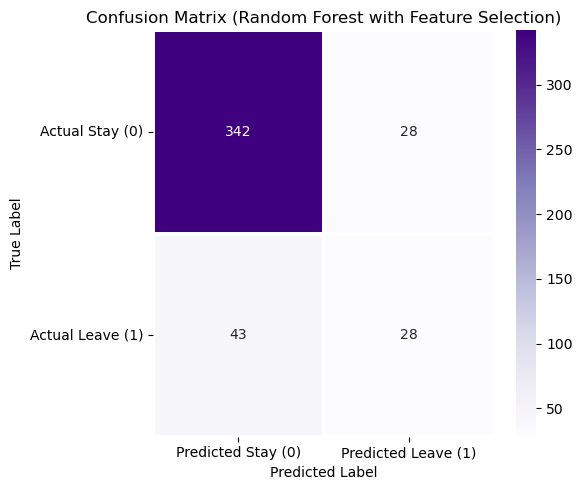

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Purples",   # ✅ single-hue gradient
    cbar=True,
    linewidths=1.5,
    linecolor="white"
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Random Forest with Feature Selection)")
plt.xticks([0.5, 1.5], ["Predicted Stay (0)", "Predicted Leave (1)"])
plt.yticks([0.5, 1.5], ["Actual Stay (0)", "Actual Leave (1)"], rotation=0)

plt.tight_layout()
plt.show()
